<a href="https://colab.research.google.com/github/Ashitha-K/Assignment/blob/main/ashitha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data=pd.read_excel('/content/iris (2).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
data.shape  # checking the shape

(150, 5)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
data.isnull().sum() # Checking for the null values

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [26]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [27]:
#using median to fill the null values
for i in ['SL', 'SW', 'PL']:
  data[i]=data[i].fillna(data[i].median())

In [28]:
data.isnull().sum() # Checking for the null values

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<Axes: >

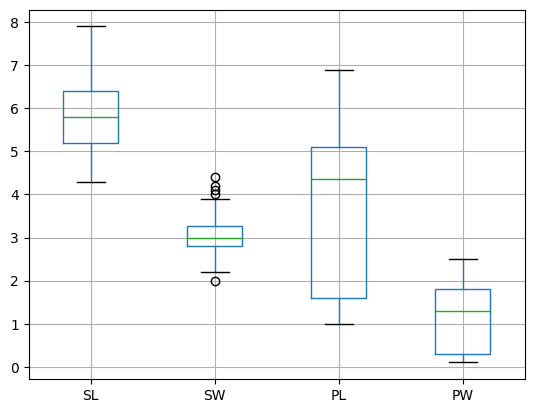

In [29]:
#Checking for outliers
data.boxplot()

In [30]:
data['SW'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 4. , 4.4, 3.8, 3.7, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [31]:
# treating outlier
outlier = ['SW']
Q1 = data[outlier].quantile(0.25)
Q3 = data[outlier].quantile(0.75)
IQR = Q3 - Q1
outliers_lower = data[outlier]<(Q1-1.5*IQR)
outliers_upper = data[outlier]>(Q3 + 1.5*IQR)
data[outlier] = data[outlier].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR, axis = 1)

<Axes: >

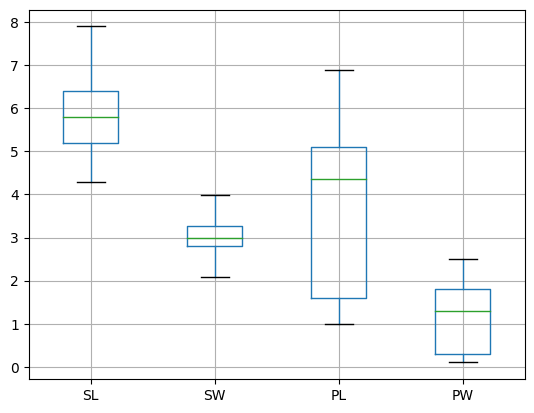

In [32]:
data.boxplot()

In [33]:
X=data.drop('Classification',axis=1)
y=data['Classification']


In [34]:
#Scaling
#applying standard scaling scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [35]:
X=sc.fit_transform(X)
X


array([[-9.34810564e-01,  1.12601219e+00, -1.38079138e+00,
        -1.31297673e+00],
       [-1.18299036e+00, -1.05724025e-01, -1.38079138e+00,
        -1.31297673e+00],
       [-6.61812789e-02,  3.86970460e-01, -1.43880783e+00,
        -1.31297673e+00],
       [-1.55526005e+00,  1.40623217e-01, -1.32277494e+00,
        -1.31297673e+00],
       [-1.05890046e+00,  1.37235943e+00, -1.38079138e+00,
        -1.31297673e+00],
       [-5.62540871e-01,  2.11140116e+00, -1.20674205e+00,
        -1.05003079e+00],
       [-1.55526005e+00,  8.79664944e-01, -1.38079138e+00,
        -1.18150376e+00],
       [-1.05890046e+00,  8.79664944e-01, -1.32277494e+00,
        -1.31297673e+00],
       [-1.80343985e+00, -3.52071267e-01, -1.38079138e+00,
        -1.31297673e+00],
       [-1.18299036e+00,  1.40623217e-01, -1.32277494e+00,
        -1.44444970e+00],
       [-5.62540871e-01, -1.05724025e-01, -1.32277494e+00,
        -1.31297673e+00],
       [-1.30708026e+00,  8.79664944e-01, -1.26475849e+00,
      

In [36]:
# Encoding
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=42)

**K-Nearest Neighbour**

In [65]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
metric_k=[]
neighbors=np.arange(1,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2) #if p=1 euclidian distance, p=2
  classifier.fit(X_train,y_train)
  y_pred=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

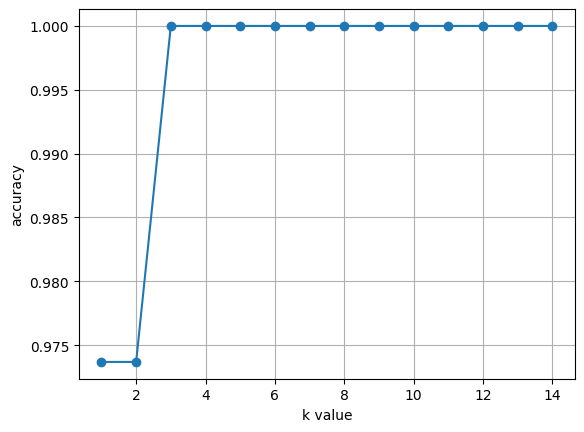

In [66]:
# plotting the accuracy graph to find out the max accuracy value to find out the best k
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [77]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2) #taking k value as 5
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test,y_pred)

In [78]:
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='weighted'))
print('Recall is', recall_score(y_test, y_pred,average='weighted'))
print('f1 score is', f1_score(y_test,y_pred,average='weighted'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


**SVM**

In [75]:
from sklearn.svm import  SVC # importing
sv_clf=SVC(kernel='linear')
sv_clf.fit(X_train,y_train) #training

SVC(kernel='linear')

In [76]:
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='weighted'))
print('Recall is', recall_score(y_test, y_pred,average='weighted'))
print('f1 score is', f1_score(y_test,y_pred,average='weighted'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


**Decision Tree**

In [71]:
from sklearn.tree import DecisionTreeClassifier # imoorting the decision tree
dt_clf=DecisionTreeClassifier(random_state=42) #
dt_clf.fit(X_train,y_train) # training
y_pred=dt_clf.predict(X_test) # predicting

In [72]:
#checking the accuracy
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='weighted'))
print('Recall is', recall_score(y_test, y_pred,average='weighted'))
print('f1 score is', f1_score(y_test,y_pred,average='weighted'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


**Random forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier # importing the random classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train) # training
y_pred=rf_clf.predict(X_test) # predicting

In [74]:
# checking the accuracy
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='weighted'))
print('Recall is', recall_score(y_test, y_pred,average='weighted'))
print('f1 score is', f1_score(y_test,y_pred,average='weighted'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


All the models gave the same accuracy.So performance of all the models seems to be same